<a href="https://colab.research.google.com/github/swetha4444/Artificial-Intelligence/blob/master/AI_assign_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Point and Polygon Classes

In [7]:
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
from collections import deque
import time
plt.rcParams["figure.figsize"] = (12,8)


class point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def __str__(self):
        string = "("+str(self.x)+","+str(self.y)+")"
        return string

class polygon:
    def __init__(self, points): #points - array
        self.points = points

    

# Convex Hull Formation


In [8]:
def Left_index(points): 

	minn = 0
	for i in range(1,len(points)): 
		if points[i].x < points[minn].x: 
			minn = i 
		elif points[i].x == points[minn].x: 
			if points[i].y > points[minn].y: 
				minn = i 
	return minn 

def orientation(p, q, r): 

	val = (q.y - p.y) * (r.x - q.x) - (q.x - p.x) * (r.y - q.y) 

	if val == 0: 
		return 0
	elif val > 0: 
		return 1
	else: 
		return 2

def convexHull(points, n): 
	
	# There must be at least 3 points 
	if n < 3: 
		return

	# Find the leftmost point 
	l = Left_index(points) 

	hull = [] 

	p = l 
	q = 0
	while(True): 
		
		# Add current point to result 
		hull.append(p) 

		q = (p + 1) % n 

		for i in range(n): 
			
			# If i is more counterclockwise 
			# than current q, then update q 
			if(orientation(points[p], 
				points[i], points[q]) == 2): 
				q = i 

		p = q 

		# While we don't come to first point 
		if(p == l): 
			break

	# Print Result
	x = []
	y = []
	pts =[]
	for each in hull:
		pts.append(points[each])
		x.append(points[each].x)
		y.append(points[each].y)
	return x,y,pts


# Path to Goal

In [18]:
class solver:

		def __init__(self, max_x, max_y, polygons, start: point, goal: point):
				self.actions = ["up", "down", "left", "right"]
				self.max_x = max_x
				self.max_y = max_y
				self.polygons = polygons
				self.start = start
				self.goal = goal
				self.path = [[start.x,start.y]] #explored nodes
		
		
		def isGoal(self,pt):
				return ((pt.x == goal.x) and (pt.y == goal.y))

		def inside(self,pt):
				x = pt.x
				y = pt.y
				flag = False
				for polygon in self.polygons:
					points = []
					for p in polygon.points:
						points.append([p.x,p.y])
					flag = (Point(x,y).within(Polygon(points)))
					if (flag == True):
						return flag
				return flag

		def h_x(self,pt):
			x = pt.x
			y = pt.y
			g_x = goal.x
			g_y = goal.y
			return (abs(x - g_x) + abs(y - g_y))
   
		def move_up(self,spt):
				pt = point(spt.x,spt.y+1)
				return pt

		
		def move_down(self,spt):
				pt = point(spt.x,spt.y-1)
				return pt


		def move_left(self,spt):
				pt = point(spt.x-1,spt.y)
				return pt

		
		def move_right(self,spt):
				pt = point(spt.x+1,spt.y)
				return pt

		def isValidMove(self, pt):
				if ((self.inside(pt) == True) or (pt.x > self.max_x or pt.x <0) or (pt.y > self.max_y or pt.y <0) or ([pt.x,pt.y] in self.path)):
					return 0
				else:
					return 1
				

		def NextMoves(self, pt):
				next = []
				next_pt = self.move_up(pt)
				if(self.isValidMove(next_pt)):
					next.append(next_pt)
				next_pt = self.move_down(pt)
				if(self.isValidMove(next_pt)):
					next.append(next_pt)
				next_pt = self.move_left(pt)
				if(self.isValidMove(next_pt)):
					next.append(next_pt)  
				next_pt = self.move_right(pt)
				if(self.isValidMove(next_pt)):
					next.append(next_pt)  
				return next     

		def get_action(self,pt):
				heu = []
				heu.append(self.h_x(self.move_up(pt)))
				heu.append(self.h_x(self.move_down(pt)))
				heu.append(self.h_x(self.move_left(pt)))
				heu.append(self.h_x(self.move_right(pt)))
				i = heu.index(min(heu))
				while(len(heu)!=0):
					#upt-updated point (next state)
					i = heu.index(min(heu))
					if (i == 0):
						upt = self.move_up(pt)
						if ((self.inside(upt) == True) or ([upt.x,upt.y] in self.path)):
							heu[0] = 100
						else:
							#print("UP",upt)
							break
					elif (i == 1):
						upt = self.move_down(pt)
						if ((self.inside(upt) == True) or ([upt.x,upt.y] in self.path)):
							heu[1] = 100
						else:
							#print("DOWN",upt)
							break
					elif (i == 2):
						upt = self.move_left(pt)
						if ((self.inside(upt) == True) or ([upt.x,upt.y] in self.path)):
							heu[2] = 100
						else:
							#print("LEFT",upt)
							break
					elif (i == 3):
						upt = self.move_right(pt)
						if ((self.inside(upt) == True) or ([upt.x,upt.y] in self.path)):
							heu[3] = 100
						else:
							#print("RIGHT",upt)
							break
				return upt
					

		def findPath(self, parent):

			self.path.clear()
			self.path.append((self.goal.x, self.goal.y))
			#print(parent)
			while self.path[-1]!=(self.start.x, self.start.y):
				#print("in")
				#print(parent[self.path[-1]])
				self.path.append(parent[self.path[-1]])
			self.path.reverse()

		def bfs(self):
			frontier = []
			explored = {}
			parent = dict()
			frontier.append((self.start.x, self.start.y))
			flag = 0

			while frontier:


				curr_pos = frontier.pop(0)
				pos = point(curr_pos[0], curr_pos[1])
				#print(str(curr_pos), ":", end=" ")
				next_moves = self.NextMoves(pos)
				explored[(curr_pos[0], curr_pos[1])] = 1
				
				for s in next_moves:
					if (s.x, s.y) not in frontier and (s.x,s.y) not in explored.keys():
						
						parent[(s.x,s.y)] = (curr_pos[0], curr_pos[1])
						frontier.append((s.x,s.y))
						if(self.isGoal(s)):
							self.findPath(parent)
							flag = 1
							break
			
				if(flag == 1):
					break


		def gbfs(self):
			curr_pos = start
			i=0
			while((self.isGoal(curr_pos) != True) and (i!=100) ):
				curr_pos = self.get_action(curr_pos)
				self.path.append([curr_pos.x,curr_pos.y])
				i+=1

		def g_x(self,pt):
			g = 0
			for i in self.path:
				print(i)
				g += 1    # inc g by 1 for each node traversed in path
			return g    

		def f_x(self,pt):
			return self.g_x(pt) + self.h_x(pt)
	 
		def get_action_a_star(self,pt):
				heuristic = []
				heuristic.append(self.f_x(self.move_up(pt)))
				heuristic.append(self.f_x(self.move_down(pt)))
				heuristic.append(self.f_x(self.move_left(pt)))
				heuristic.append(self.f_x(self.move_right(pt)))
				i = heuristic.index(min(heuristic))
				while(len(heuristic)!=0):
					#upt-updated point (next state)
					i = heuristic.index(min(heuristic))
					if (i == 0):
						upt = self.move_up(pt)
						if(self.isValidMove(upt)==0):
							heuristic[0] = 100
						else:
							break
					elif (i == 1):
						upt = self.move_down(pt)
						if(self.isValidMove(upt)==0):
							heuristic[1] = 100
						else:
							break
					elif (i == 2):
						upt = self.move_left(pt)
						if(self.isValidMove(upt)==0):
							heuristic[2] = 100
						else:
							break
					elif (i == 3):
						upt = self.move_right(pt)
						if(self.isValidMove(upt)==0):
							heuristic[3] = 100
						else:
							break
				return upt
    
		def a_star(self):
			curr_pos = start
			i=0
			while((self.isGoal(curr_pos) != True) and (i!=100) ):
				curr_pos = self.get_action_a_star(curr_pos)
				self.path.append([curr_pos.x,curr_pos.y])
				i+=1    



#Creating the Environment

In [19]:
def create_environment():
    polygons = []

    points = []
    points.append(point(2.0,0.5)) 
    points.append(point(12.0, 0.5)) 
    points.append(point(9.0, 4.0)) 
    points.append(point(2.0, 4.0)) 
    x,y,points = convexHull(points, len(points))
    polygons.append(polygon(points))
    x.append(x[0])
    y.append(y[0])
    plt.scatter(x,y)
    plt.plot(x,y,'b')

    points = []
    points.append(point(13.5, 2.0))
    points.append(point(15.7, 4.5))
    points.append(point(13.0, 7.2))
    x,y,points = convexHull(points, len(points))
    polygons.append(polygon(points))
    x.append(x[0])
    y.append(y[0])
    plt.scatter(x,y)
    plt.plot(x,y,'b')

    points = []
    points.append(point(19.0, 0.7))
    points.append(point(21, 1.8))
    points.append(point(21.0, 4.0))
    points.append(point(19.0,5.8))
    points.append(point(21, 1.8))
    points.append(point(21.0, 4.0))
    x,y,points = convexHull(points, len(points))
    polygons.append(polygon(points))
    x.append(x[0])
    y.append(y[0])
    plt.scatter(x,y)
    plt.plot(x,y,'b')

    points = []
    points.append(point(5.0, 6.0))
    points.append(point(5.0, 6.0))
    points.append(point(5.0, 9.8))
    points.append(point(1.0, 10.4))
    points.append(point(1.8, 7.0))
    x,y,points = convexHull(points, len(points))
    polygons.append(polygon(points))
    x.append(x[0])
    y.append(y[0])
    plt.scatter(x,y)
    plt.plot(x,y,'b')

    points = []
    points.append(point(7.0, 5.8))
    points.append(point(10.0, 5.8))
    points.append(point(8.5, 10.0))
    x,y,points = convexHull(points, len(points))
    polygons.append(polygon(points))
    x.append(x[0])
    y.append(y[0])
    plt.scatter(x,y)
    plt.plot(x,y,'b')

    points.append(point(11.0, 9.2))
    points.append(point(14.0, 11.8))
    points.append(point(13.0, 13.5))
    points.append(point(11.3, 13.0))
    x,y,points = convexHull(points, len(points))
    polygons.append(polygon(points))
    x.append(x[0])
    y.append(y[0])
    plt.scatter(x,y)
    plt.plot(x,y,'b')


    #Starting and Goal States
    start = point(1.0,2.0)
    goal = point(7.0,8.0)
    plt.scatter([start.x,goal.x],[start.y,goal.y])
    plt.annotate("  S",(start.x,start.y))
    plt.annotate("  G",(goal.x,goal.y))

    return polygons,start,goal

#Solving using BFS



Start State:  (1.0,2.0)
Goal State:  (7.0,8.0)
Actions:  ['up', 'down', 'left', 'right']


			PATH:



		BFS


[(1.0, 2.0), (1.0, 3.0), (1.0, 4.0), (1.0, 5.0), (1.0, 6.0), (2.0, 6.0), (3.0, 6.0), (4.0, 6.0), (5.0, 6.0), (5.0, 7.0), (5.0, 8.0), (6.0, 8.0), (7.0, 8.0)]
(1.0, 2.0)
(1.0, 3.0)
(1.0, 4.0)
(1.0, 5.0)
(1.0, 6.0)
(2.0, 6.0)
(3.0, 6.0)
(4.0, 6.0)
(5.0, 6.0)
(5.0, 7.0)
(5.0, 8.0)
(6.0, 8.0)
(7.0, 8.0)



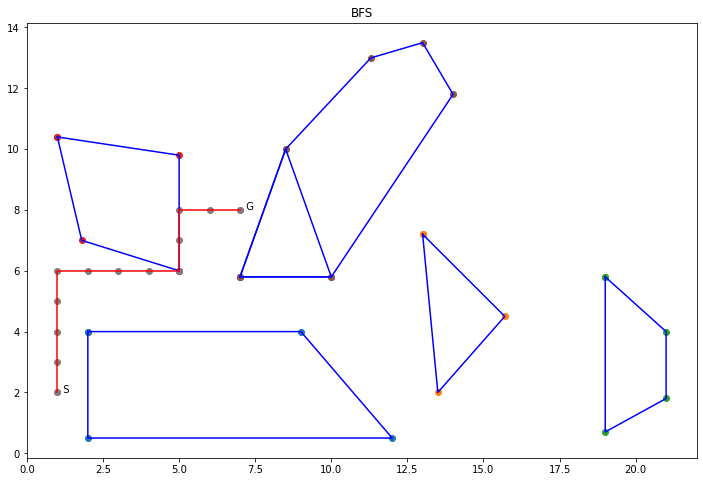

CPU times: user 326 ms, sys: 18.9 ms, total: 345 ms
Wall time: 319 ms


In [20]:
%%time
#Creating Polygons
polygons,start,goal = create_environment()
g = solver(30,30,polygons, start, goal)
print("\n\nStart State: ",g.start)
print("Goal State: ",g.goal)
print("Actions: ",g.actions)
print("\n\n\t\t\tPATH:\n")

#Solving using Greedy BFS
print("\n\n\t\tBFS\n\n")

g.bfs()
print(g.path)
x=[]
y=[]
for pt in g.path:
  x.append(pt[0])
  y.append(pt[1])
  print(pt)

plt.scatter(x,y)
plt.plot(x,y,'r')

#printing plot
print()
plt.title("BFS")
plt.show()

#Solving using Greedy BFS




Start State:  (1.0,2.0)
Goal State:  (7.0,8.0)
Actions:  ['up', 'down', 'left', 'right']


			PATH:



		GREEDY BFS


[1.0, 2.0]
[1.0, 3.0]
[1.0, 4.0]
[1.0, 5.0]
[1.0, 6.0]
[1.0, 7.0]
[1.0, 8.0]
[1.0, 9.0]
[1.0, 10.0]
[1.0, 11.0]
[2.0, 11.0]
[3.0, 11.0]
[4.0, 11.0]
[4.0, 10.0]
[5.0, 10.0]
[5.0, 9.0]
[5.0, 8.0]
[6.0, 8.0]
[7.0, 8.0]



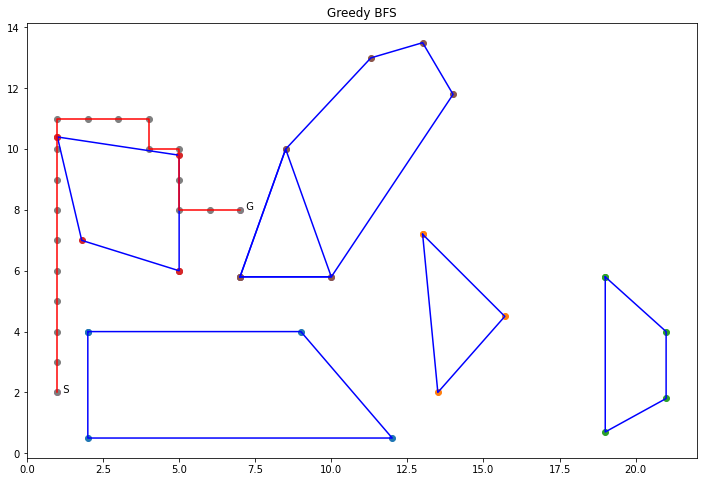

CPU times: user 228 ms, sys: 10.1 ms, total: 239 ms
Wall time: 234 ms


In [21]:
%%time
#Creating Polygons
polygons,start,goal = create_environment()

g = solver(30,30,polygons, start, goal)


print("\n\nStart State: ",g.start)
print("Goal State: ",g.goal)
print("Actions: ",g.actions)
print("\n\n\t\t\tPATH:\n")

#Solving using Greedy BFS
print("\n\n\t\tGREEDY BFS\n\n")
g.gbfs()


x=[]
y=[]

for pt in g.path:
  x.append(pt[0])
  y.append(pt[1])
  print(pt)

plt.scatter(x,y)
plt.plot(x,y,'r')

#printing plot
print()
plt.title("Greedy BFS")
plt.show()


#Solving using A* 



Start State:  (1.0,2.0)
Goal State:  (7.0,8.0)
Actions:  ['up', 'down', 'left', 'right']


			PATH:



		A* Algo


[1.0, 2.0]
[1.0, 2.0]
[1.0, 2.0]
[1.0, 2.0]
[1.0, 2.0]
[1.0, 3.0]
[1.0, 2.0]
[1.0, 3.0]
[1.0, 2.0]
[1.0, 3.0]
[1.0, 2.0]
[1.0, 3.0]
[1.0, 2.0]
[1.0, 3.0]
[1.0, 4.0]
[1.0, 2.0]
[1.0, 3.0]
[1.0, 4.0]
[1.0, 2.0]
[1.0, 3.0]
[1.0, 4.0]
[1.0, 2.0]
[1.0, 3.0]
[1.0, 4.0]
[1.0, 2.0]
[1.0, 3.0]
[1.0, 4.0]
[1.0, 5.0]
[1.0, 2.0]
[1.0, 3.0]
[1.0, 4.0]
[1.0, 5.0]
[1.0, 2.0]
[1.0, 3.0]
[1.0, 4.0]
[1.0, 5.0]
[1.0, 2.0]
[1.0, 3.0]
[1.0, 4.0]
[1.0, 5.0]
[1.0, 2.0]
[1.0, 3.0]
[1.0, 4.0]
[1.0, 5.0]
[1.0, 6.0]
[1.0, 2.0]
[1.0, 3.0]
[1.0, 4.0]
[1.0, 5.0]
[1.0, 6.0]
[1.0, 2.0]
[1.0, 3.0]
[1.0, 4.0]
[1.0, 5.0]
[1.0, 6.0]
[1.0, 2.0]
[1.0, 3.0]
[1.0, 4.0]
[1.0, 5.0]
[1.0, 6.0]
[1.0, 2.0]
[1.0, 3.0]
[1.0, 4.0]
[1.0, 5.0]
[1.0, 6.0]
[1.0, 7.0]
[1.0, 2.0]
[1.0, 3.0]
[1.0, 4.0]
[1.0, 5.0]
[1.0, 6.0]
[1.0, 7.0]
[1.0, 2.0]
[1.0, 3.0]
[1.0, 4.0]
[1.0, 5.0]
[1.0, 6.0]
[1.0, 7.0]
[1.0, 2.0]
[1.0, 3.0]
[1.

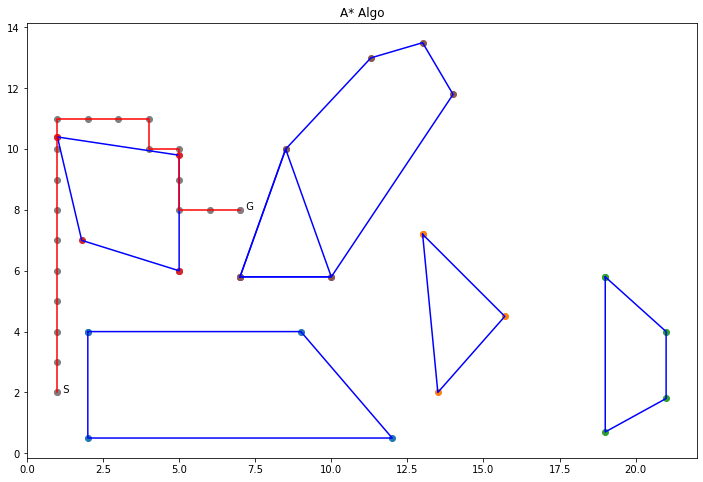

CPU times: user 400 ms, sys: 69.6 ms, total: 470 ms
Wall time: 385 ms


In [22]:
%%time
#Creating Polygons
polygons,start,goal = create_environment()

g = solver(30,30,polygons, start, goal)


print("\n\nStart State: ",g.start)
print("Goal State: ",g.goal)
print("Actions: ",g.actions)
print("\n\n\t\t\tPATH:\n")

#Solving using Greedy BFS
print("\n\n\t\tA* Algo\n\n")
g.a_star()


x=[]
y=[]

for pt in g.path:
  x.append(pt[0])
  y.append(pt[1])
  print(pt)

plt.scatter(x,y)
plt.plot(x,y,'r')

#printing plot
print()
plt.title("A* Algo")
plt.show()


#Empirical Analysis

In [ ]:
def analysis():
    #BFS
    times1 = []
    for i in range(10):
      st = time.time()
      g.bfs()
      et = time.time()
      times1.append(round((et-st)*1000,2)) #running 1000 times

    #GBFS
    times2 = []
    for i in range(10):
      st = time.time()
      g.gbfs()
      et = time.time()
      times2.append(round((et-st)*1000,2))

    #A* Algo
    times3 = []
    for i in range(10):
      st = time.time()
      g.a_star()
      et = time.time()
      times3.append(round((et-st)*1000,2))
 

    plt.plot(times1, label="BFS")
    plt.plot(times2,label="Greedy BFS")
    plt.plot(times3,label="A*")
    plt.show()

analysis()


#Conclusion:

*   BFS though faster , does not find near optimal path
*   Greedy-BFS faster than A*, does not contain shortest path
*   A* though slower finds an near optimal path






